# Decision Trees & Entropy Code‐Along Lab

Within this lab, we will review:
* the decision tree structure
* calculating the Gini impurity
* building a decision tree with scikit‐learn
* assessing the performance of decision trees

In each section, you will see code examples with detailed commentary and visualization.

## Understanding Trees

In this section we illustrate a simple representation of a  tree. The tree is represented as a Python dictionary where a node contains a 'question' and two branches for 'yes' and 'no' answers.

In [5]:
from pprint import pprint

simple_tree = {
    'question': 'Do you have a question on trees?',
    'yes': {
        'question': 'Did you consult the notes?',
        'yes': {
            'question': 'Did you ask a staff member?',
            'yes': {
                'question': 'Was your question answered?',
                'yes': 'Great! Go forward with confidence.',
                'no': 'Google documentation & articles.'
            },
            'no': 'Ask a staff member.'
        },
        'no': 'Look at the notes.'
    },
    'no': {
        'question': 'Are you sure?',
        'yes': {
            'question': 'Are you reeaallly sure?',
            'yes': 'Ok! Tell me what a tree leaf is then.',
            'no': 'Great, ask a question.'
        },
        'no': 'Great, ask a question.'
    }
}

print('Simple decision tree defined as a dictionary:')
pprint(simple_tree)

Simple decision tree defined as a dictionary:
{'no': {'no': 'Great, ask a question.',
        'question': 'Are you sure?',
        'yes': {'no': 'Great, ask a question.',
                'question': 'Are you reeaallly sure?',
                'yes': 'Ok! Tell me what a tree leaf is then.'}},
 'question': 'Do you have a question on trees?',
 'yes': {'no': 'Look at the notes.',
         'question': 'Did you consult the notes?',
         'yes': {'no': 'Ask a staff member.',
                 'question': 'Did you ask a staff member?',
                 'yes': {'no': 'Google documentation & articles.',
                         'question': 'Was your question answered?',
                         'yes': 'Great! Go forward with confidence.'}}}}


The code above creates a Python dictionary called `simple_tree` that mimics a decision tree. The root node asks a question; based on the answer, it branches into a nested dictionary for the 'yes' case or directly returns an action for the 'no' case. Notice how each key represents a decision point.

![img](tree.png)

## Understanding the Gini Index and Node Purity

In this section we calculate the Gini impurity, which measures the purity of a node. A lower Gini index indicates a purer node (aka a node is more homogenous). 

In [11]:
def compute_gini(counts):
    """
    Compute the Gini impurity for a node given the counts of classes.

    Parameters
    -----------
    counts: a list of counts for each class

    Returns
    -----------
    Gini impurity value (float)
    """
    total = sum(counts)
    # for each count of classes
    gini = 0
    for c in counts:
        # add the squared ratio to the gini index
        gini += (c / total) ** 2
    # calculate the impurity
    impurity = 1 - gini
    return impurity

The `compute_gini` function accepts a list of counts for each class present at a node. It first computes the total count, then calculates the impurity by subtracting the sum of squared probabilities from 1. This function is critical to understanding how decision trees choose the best split.

In [12]:
# Calculate Gini impurity for a node with an impure split [10, 5]
gini_value = compute_gini([10, 5])
print('Gini impurity for counts [10, 5]:', gini_value)

Gini impurity for counts [10, 5]: 0.4444444444444444


In [ ]:
# let's see what happens when the ratio mostly leans towards one class [12, 3]
gini_value = compute_gini([12, 3])
print('Gini impurity for counts [12, 3]:', gini_value)

Gini impurity for counts [12, 3]: 0.31999999999999984


In [ ]:
# the split is getting more pure! let's see what happens when we have a "pure" split [15, 0]
gini_value = compute_gini([15, 0])
print('Gini impurity for counts [15, 0]:', gini_value)

Gini impurity for counts [15, 0]: 0.0


The code cell above calculates the Gini impurity for a node with two classes with varying counts. The output shows how pure (or impure) this distribution is. 

## Growing a Decision Tree with scikit‐learn

In this section we use a real dataset and scikit‐learn's `DecisionTreeClassifier` to build and inspect a decision tree model. We will to continue our exploration of the bank dataset from yesterday.

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# TODO: load the bank dataset
...

# TODO: select predictors & target variables
...
...

# TODO: perform a train test split
...

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier with a maximum depth of 3 and a fixed random state for reproducibility
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the classifier to the data
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

This cell creates a decision tree classifier using scikit‐learn’s `DecisionTreeClassifier`. The classifier is configured with a maximum depth of 3 and a fixed random state to ensure reproducibility. The model is then fitted to the bank dataset features and target values.

In [18]:
from sklearn.tree import export_text

# Export the tree structure as text
tree_rules = export_text(dt, feature_names=X_train.columns)
print('Decision tree structure:')
print(tree_rules)

Decision tree structure:
|--- duration <= 628.50
|   |--- duration <= 211.50
|   |   |--- duration <= 90.50
|   |   |   |--- class: no
|   |   |--- duration >  90.50
|   |   |   |--- class: no
|   |--- duration >  211.50
|   |   |--- duration <= 411.50
|   |   |   |--- class: no
|   |   |--- duration >  411.50
|   |   |   |--- class: no
|--- duration >  628.50
|   |--- duration <= 766.50
|   |   |--- balance <= 303.50
|   |   |   |--- class: no
|   |   |--- balance >  303.50
|   |   |   |--- class: yes
|   |--- duration >  766.50
|   |   |--- balance <= 771.50
|   |   |   |--- class: yes
|   |   |--- balance >  771.50
|   |   |   |--- class: no



The cell above uses `export_text` to generate a textual representation of the decision tree. This output details the splits and decision criteria at each node, making it easier to understand how the model makes predictions.

Let's use matplotlib and the tree object from sklearn to visualize what this decision tree looks like.

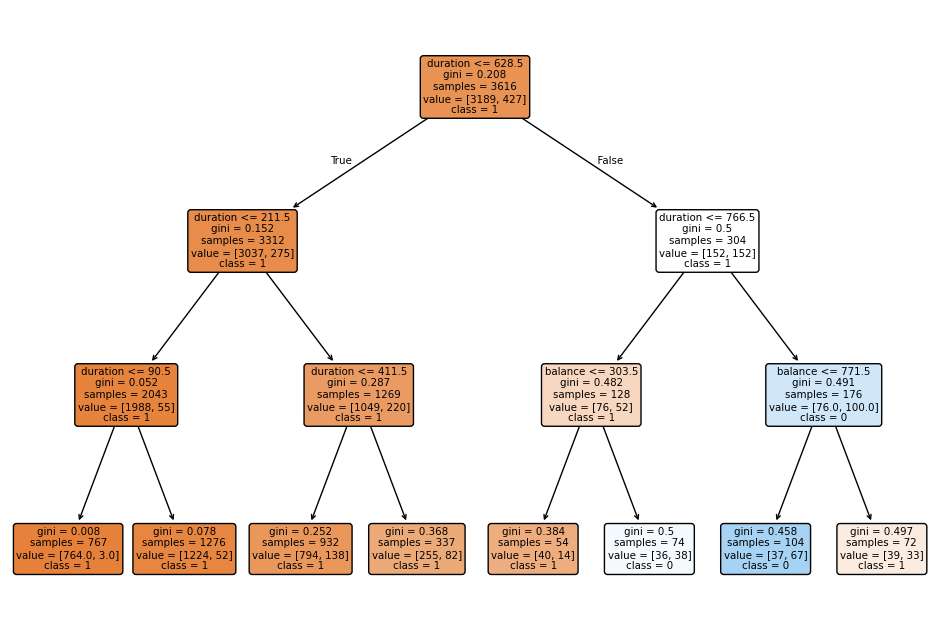

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
tree.plot_tree(dt, feature_names=X_train.columns, filled=True, class_names=["1", "0"], rounded=True)
plt.show()

In [25]:
yhat = dt.predict(X_test) 

confusion = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)

print("Confusion Matrix \n", confusion)
print("\nClassification Report\n", class_report)

Confusion Matrix 
 [[782  29]
 [ 79  15]]

Classification Report
               precision    recall  f1-score   support

          no       0.91      0.96      0.94       811
         yes       0.34      0.16      0.22        94

    accuracy                           0.88       905
   macro avg       0.62      0.56      0.58       905
weighted avg       0.85      0.88      0.86       905



As always, let's use hyperparameter search to see if we can discover better performance. 

In [ ]:
# TODO: implement random search on the DecisionTree model to find best hyperparams
# DOCS: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
...

dt = DecisionTreeClassifier(random_state=42)

# TODO: set up RandomizedSearchCV with 5-fold cross-validation
...

# TODO: fit this model on your training data
...

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(3, 10)})

In [ ]:
# extract the best classifier
best_dt = random_search.best_estimator_

yhat = best_dt.predict(X_test) 

confusion = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)

print("Confusion Matrix \n", confusion)
print("\nClassification Report\n", class_report)

Confusion Matrix 
 [[782  29]
 [ 79  15]]

Classification Report
               precision    recall  f1-score   support

          no       0.91      0.96      0.94       811
         yes       0.34      0.16      0.22        94

    accuracy                           0.88       905
   macro avg       0.62      0.56      0.58       905
weighted avg       0.85      0.88      0.86       905



In [32]:
random_search.best_params_

{'max_depth': 3, 'criterion': 'gini'}

## Variance in Decision Trees and Model Evaluation

Even though we found a set of "best" hyperparameters, decision trees are known for their high variance. In this section, we illustrate this by training models with different random states and evaluating their performance using cross-validation.

In [44]:
from sklearn.model_selection import cross_val_score

# instantiate 2 DecisionTreeClassifiers for the train set to display variance
dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)

scores1 = cross_val_score(dt1, X_test, y_test, cv=5)
print('Cross-validation scores for first tree:', scores1)

Cross-validation scores for first tree: [0.83088235 0.8125     0.80442804 0.8302583  0.8302583 ]


In [45]:
dt2 = DecisionTreeClassifier()
dt2.fit(X_train, y_train)

scores2 = cross_val_score(dt2, X_test, y_test, cv=5)
print('Cross-validation scores for second tree:', scores2)

Cross-validation scores for second tree: [0.83823529 0.80882353 0.81549815 0.83394834 0.83763838]


This cell demonstrates variance by training two decision tree models . The `cross_val_score` function is used to evaluate each model with 5-fold cross-validation. Comparing the scores helps illustrate how sensitive decision trees can be to variations in training processes.

Notice that the same does not occur for the previous classifier's we've discussed.
* kNN
* Naive Bayes

### kNN Variance Check

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier()
knn1.fit(X_train, y_train)

scores1 = cross_val_score(knn1, X_test, y_test, cv=5)
print('Cross-validation scores for first tree:', scores1)

Cross-validation scores for first tree: [0.87867647 0.86764706 0.88560886 0.83394834 0.87084871]


In [48]:
knn2 = KNeighborsClassifier()
knn2.fit(X_train, y_train)

scores2 = cross_val_score(knn1, X_test, y_test, cv=5)
print('Cross-validation scores for first tree:', scores2)

Cross-validation scores for first tree: [0.87867647 0.86764706 0.88560886 0.83394834 0.87084871]


### Naive Bayes Check

In [49]:
from sklearn.naive_bayes import GaussianNB

gnb1 = GaussianNB()
gnb1.fit(X_train, y_train)

scores1 = cross_val_score(gnb1, X_test, y_test, cv=5)
print('Cross-validation scores for first tree:', scores1)

Cross-validation scores for first tree: [0.88235294 0.89338235 0.89298893 0.88560886 0.87084871]


In [50]:
gnb2 = GaussianNB()
gnb2.fit(X_train, y_train)

scores2 = cross_val_score(gnb1, X_test, y_test, cv=5)
print('Cross-validation scores for first tree:', scores2)

Cross-validation scores for first tree: [0.88235294 0.89338235 0.89298893 0.88560886 0.87084871]
